In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [30]:
result = pd.read_csv("./data/result3.csv")
result.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,돈까스,bbo_muksta,-,-,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,2,33.33,3126,0.396449,377
1,돈까스,___foodtour,-,-,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,0,0.00,3750,0.475587,467
2,돈까스,mukpresident,-,-,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,2,25.00,2761,0.350159,634
3,돈까스,fooseidon_,-,-,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#북천, #북천돈까스🔱11:00~19:30, #푸세이돈_용...",18,0,0.00,7885,1.000000,469
4,돈까스,cayeongmi9,-,-,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,4,21.05,317,0.040203,393


In [31]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13330 non-null  object 
 1   ID            13330 non-null  object 
 2   Post_num      13330 non-null  object 
 3   Followers     13330 non-null  object 
 4   Contents      13330 non-null  object 
 5   Tags          12042 non-null  object 
 6   Tags_sum      13330 non-null  int64  
 7   Tags_count    13330 non-null  int64  
 8   Tags_rate     13330 non-null  float64
 9   Likes         13330 non-null  int64  
 10  Scaled_likes  13330 non-null  float64
 11  Contents_len  13330 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [32]:
result["Tags"] = result["Tags"].fillna("0")   # 결측치 제거

In [33]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13330 non-null  object 
 1   ID            13330 non-null  object 
 2   Post_num      13330 non-null  object 
 3   Followers     13330 non-null  object 
 4   Contents      13330 non-null  object 
 5   Tags          13330 non-null  object 
 6   Tags_sum      13330 non-null  int64  
 7   Tags_count    13330 non-null  int64  
 8   Tags_rate     13330 non-null  float64
 9   Likes         13330 non-null  int64  
 10  Scaled_likes  13330 non-null  float64
 11  Contents_len  13330 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


# 1. 치킨


In [119]:
# 치킨 카테고리만 추출
ch = result[result["Category"] == "치킨"].copy()
ch.reset_index(drop = True, inplace = True)
ch.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,치킨,z.e.o.m,236.0,8603.0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,3,27.27,1040,0.175646,477
1,치킨,foodgangster_fgg,128.0,3360.0,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,3,33.33,109,0.018409,262
2,치킨,bboong_bbang_2,741.0,6928.0,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,511
3,치킨,dhrkspths,2178.0,27000.0,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,26
4,치킨,a_a_bl0s2om,606.0,1020.0,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,8,28.57,19,0.003209,193


In [120]:
# 치킨 맛집 키워드 들어간 거 찾는 컬럼 추가

example_list = ['치킨맛집']
test = '|'.join(example_list)
ch["Tags"].str.split("'#'")[0].count(example_list[0])

0

In [121]:
example_list = ['치킨맛집']
Tags_count = [ ]
for i in range(len(ch)):
    text=[]
    sentence = ch["Tags"].str.split("#")[i][1:]
    for s in range(len(sentence)):
        if "," in sentence[s]:
            text.append(sentence[s][:-2])
        else:
            text.append(sentence[s])

    tmp=0
    for j in range(len(example_list)):
        tmp += sum(map(lambda x : 1 if x == example_list[j] else 0, text))
        if tmp == 0:
            tmp = 0
        else:
            tmp = 1
    Tags_count.append(tmp)

In [122]:
T = pd.DataFrame(Tags_count)
T.value_counts()

0    1745
1     255
dtype: int64

In [123]:
ch["ChMcnt"] = Tags_count

In [124]:
example_list = ['맛스타그램',"먹스타그램"]
Tags_count = [ ]
for i in range(len(ch)):
    text=[]
    sentence = ch["Tags"].str.split("#")[i][1:]
    for s in range(len(sentence)):
        if "," in sentence[s]:
            text.append(sentence[s][:-2])
        else:
            text.append(sentence[s])

    tmp=0
    for j in range(len(example_list)):
        tmp += sum(map(lambda x : 1 if x == example_list[j] else 0, text))
        if tmp == 0:
            tmp = 0
        else:
            tmp = 1
    Tags_count.append(tmp)

In [125]:
ch["Stargramcnt"] = Tags_count

In [126]:
ch.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len,ChMcnt,Stargramcnt
0,치킨,z.e.o.m,236.0,8603.0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,3,27.27,1040,0.175646,477,1,0
1,치킨,foodgangster_fgg,128.0,3360.0,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,3,33.33,109,0.018409,262,1,0
2,치킨,bboong_bbang_2,741.0,6928.0,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,511,0,0
3,치킨,dhrkspths,2178.0,27000.0,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,26,0,0
4,치킨,a_a_bl0s2om,606.0,1020.0,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,8,28.57,19,0.003209,193,0,1


In [127]:
from tqdm.notebook import tqdm
example_list = ["광고","협찬","제공"]
Tags_count = [ ]
for i in tqdm(range(len(ch))):
    sentence = ch["Tags"].str.split("#")[i][1:]
    tmp=0
    for j in range(len(example_list)):
        tmp += sum(map(lambda x : 1 if example_list[j] in x else 0, sentence))
        if tmp == 0:
            tmp = 0
        else:
            tmp = 1
    Tags_count.append(tmp)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [128]:
T = pd.DataFrame(Tags_count)
T.value_counts()

0    1888
1     112
dtype: int64

In [129]:
ch["Adcnt"] = Tags_count

In [130]:
from tqdm.notebook import tqdm
example_list = ["일상"]
Tags_count = [ ]
for i in tqdm(range(len(ch))):
    sentence = ch["Tags"].str.split("#")[i][1:]
    tmp=0
    for j in range(len(example_list)):
        tmp += sum(map(lambda x : 1 if example_list[j] in x else 0, sentence))
        if tmp == 0:
            tmp = 0
        else:
            tmp = 2
    Tags_count.append(tmp)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [131]:
T = pd.DataFrame(Tags_count)
T.value_counts()

0    1720
2     280
dtype: int64

In [132]:
ch["Dailycnt"] = Tags_count

In [133]:
ch.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len,ChMcnt,Stargramcnt,Adcnt,Dailycnt
0,치킨,z.e.o.m,236.0,8603.0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,3,27.27,1040,0.175646,477,1,0,0,0
1,치킨,foodgangster_fgg,128.0,3360.0,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,3,33.33,109,0.018409,262,1,0,0,0
2,치킨,bboong_bbang_2,741.0,6928.0,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,511,0,0,0,0
3,치킨,dhrkspths,2178.0,27000.0,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,26,0,0,0,0
4,치킨,a_a_bl0s2om,606.0,1020.0,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,8,28.57,19,0.003209,193,0,1,0,0


In [134]:
ch["Ad_Daily"] = ch["Dailycnt"]+ch["Adcnt"]

In [105]:
ch

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len,ChMcnt,Stargramcnt,Adcnt,Dailycnt,Ad_Daily,Ad_ Daliy_sum
0,치킨,z.e.o.m,236.0,8603.0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,3,27.27,1040,0.175646,477,1,0,0,0,0,0
1,치킨,foodgangster_fgg,128.0,3360.0,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,3,33.33,109,0.018409,262,1,0,0,0,0,0
2,치킨,bboong_bbang_2,741.0,6928.0,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,511,0,0,0,0,0,0
3,치킨,dhrkspths,2178.0,27000.0,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,26,0,0,0,0,0,0
4,치킨,a_a_bl0s2om,606.0,1020.0,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,8,28.57,19,0.003209,193,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,치킨,hongyoungjoo87,926.0,81.0,아플땐 치킨 저녁 치킨,"#저녁, #치킨",2,1,50.00,18,0.003040,15,0,0,0,0,0,0
1996,치킨,m.m_zl,12.0,65.0,낮과밤 어느하나도 안이쁜 곳이 없떠 ㅎ ㅎ,,0,0,0.00,20,0.003378,24,0,0,0,0,0,0
1997,치킨,stomach_endoscope,3949.0,1322.0,어떻게 라면에 주먹밥이 팔천원,,0,0,0.00,74,0.012498,16,0,0,0,0,0,0
1998,치킨,nolgoo,831.0,212.0,오늘 먹은거솥밥 넘 맛났당윤선빵과 함께 커플스타그램 럽스타그램 먹스타그램 ...,"#커플스타그램, #럽스타그램, #먹스타그램, #솥밥, #도미관자솥밥, #전복솥밥, ...",25,2,8.00,21,0.003547,142,0,1,0,0,0,0


In [135]:
Ad_Daily_sum = []
for i in range(len(ch)):
    if ch["Ad_Daily"][i] == 0 :
        Ad_Daily_sum.append(0)
    if ch["Ad_Daily"][i] == 1 :
        Ad_Daily_sum.append(1)
    if ch["Ad_Daily"][i] == 2 :
        Ad_Daily_sum.append(2)
    if ch["Ad_Daily"][i] == 3 :
        Ad_Daily_sum.append(0)
        
ch["Ad_ Daliy_sum"] = Ad_Daily_sum

In [136]:
# 광고|협찬|제공 1 , 일상 2, 이외 0(겹쳐있는것도 0)
ch["Ad_ Daliy_sum"].value_counts().sum()

2000

In [137]:
ch.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len,ChMcnt,Stargramcnt,Adcnt,Dailycnt,Ad_Daily,Ad_ Daliy_sum
0,치킨,z.e.o.m,236.0,8603.0,둥근해 대신 올해는 동근 해가 떴습니다 우동사리에 치밥까지 치킨으로 풀코스 즐기...,"#동근이숯불두마리치킨, #동근이숯불두마리치킨, #치킨, #치킨맛집, #배달치킨, #...",11,3,27.27,1040,0.175646,477,1,0,0,0,0,0
1,치킨,foodgangster_fgg,128.0,3360.0,협찬 떡볶이에 타피오카 펄 쏟은 줄 알았다 버블티같은 떡볶이다 맥주를 부르는...,"#치킨매니아, #푸드갱_배달, #배달맛집, #치킨맛집, #떡볶이맛집, #배달음식추천...",9,3,33.33,109,0.018409,262,1,0,0,0,0,0
2,치킨,bboong_bbang_2,741.0,6928.0,돼지 사료 일지 506 지코바 성정점뿡빵쓰가 스트레스 받으면 주기적 수혈하는 ...,,0,0,0.00,109,0.018409,511,0,0,0,0,0,0
3,치킨,dhrkspths,2178.0,27000.0,얼마나 맛있었으면 포장까지ㄷㄷㄷ 범맥주 임,,0,0,0.00,9,0.001520,26,0,0,0,0,0,0
4,치킨,a_a_bl0s2om,606.0,1020.0,노랑통닭ㆍㆍㆍ 대구맛집 먹방 instafood 요리스타그램 요리 맛스타...,"#대구맛집, #먹방, #instafood, #요리스타그램, #요리, #맛스타그램, ...",28,8,28.57,19,0.003209,193,0,1,0,0,0,0


In [118]:
ch["Ad_ Daliy_sum"].value_counts()

0    1616
2     276
1     108
Name: Ad_ Daliy_sum, dtype: int64

In [138]:
# 필요없는 컬럼 삭제
ch = ch.drop(columns=["Scaled_likes", "Category", "ID", "Contents", "Tags","Ad_Daily"])

In [139]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Post_num       2000 non-null   object 
 1   Followers      2000 non-null   object 
 2   Tags_sum       2000 non-null   int64  
 3   Tags_count     2000 non-null   int64  
 4   Tags_rate      2000 non-null   float64
 5   Likes          2000 non-null   int64  
 6   Contents_len   2000 non-null   int64  
 7   ChMcnt         2000 non-null   int64  
 8   Stargramcnt    2000 non-null   int64  
 9   Adcnt          2000 non-null   int64  
 10  Dailycnt       2000 non-null   int64  
 11  Ad_ Daliy_sum  2000 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 187.6+ KB


In [140]:
ch["Post_num"] = ch["Post_num"].astype("float64")
ch["Followers"] = ch["Followers"].astype("float64")

In [141]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Post_num       2000 non-null   float64
 1   Followers      2000 non-null   float64
 2   Tags_sum       2000 non-null   int64  
 3   Tags_count     2000 non-null   int64  
 4   Tags_rate      2000 non-null   float64
 5   Likes          2000 non-null   int64  
 6   Contents_len   2000 non-null   int64  
 7   ChMcnt         2000 non-null   int64  
 8   Stargramcnt    2000 non-null   int64  
 9   Adcnt          2000 non-null   int64  
 10  Dailycnt       2000 non-null   int64  
 11  Ad_ Daliy_sum  2000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 187.6 KB


In [142]:
ch.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Likes,Contents_len,ChMcnt,Stargramcnt,Adcnt,Dailycnt,Ad_ Daliy_sum
0,236.0,8603.0,11,3,27.27,1040,477,1,0,0,0,0
1,128.0,3360.0,9,3,33.33,109,262,1,0,0,0,0
2,741.0,6928.0,0,0,0.00,109,511,0,0,0,0,0
3,2178.0,27000.0,0,0,0.00,9,26,0,0,0,0,0
4,606.0,1020.0,28,8,28.57,19,193,0,1,0,0,0


In [21]:
# 순서 변경 (종속변수 맨 뒤로/편할려구)
ch = ch[['Post_num', 'Tags_sum', 'Tags_count', 'Tags_rate','Contents_len','Likes', 'ChMcnt','Stargramcnt', 'Followers']]
ch.head()

,Post_num,Tags_sum,Tags_count,Tags_rate,Contents_len,Likes,ChMcnt,Stargramcnt,Followers
0,236.0,11,3,27.27,477,1040,1,0,8603.0
1,128.0,9,3,33.33,262,109,1,0,3360.0
2,741.0,0,0,0.00,511,109,0,0,6928.0
3,2178.0,0,0,0.00,26,9,0,0,27000.0
4,606.0,28,8,28.57,193,19,0,1,1020.0


In [144]:
# 정규화가 필요한 컬럼 복사

ch1 = ch[['Post_num', 'Tags_sum', 'Tags_count', 'Tags_rate','Contents_len','Followers']].copy()
ch1.head()

,Post_num,Tags_sum,Tags_count,Tags_rate,Contents_len,Followers
0,236.0,11,3,27.27,477,8603.0
1,128.0,9,3,33.33,262,3360.0
2,741.0,0,0,0.00,511,6928.0
3,2178.0,0,0,0.00,26,27000.0
4,606.0,28,8,28.57,193,1020.0


In [143]:
ch_notmm = ch[['ChMcnt','Stargramcnt','Ad_ Daliy_sum',"Adcnt","Dailycnt",'Likes']]
ch_notmm.head()

,ChMcnt,Stargramcnt,Ad_ Daliy_sum,Adcnt,Dailycnt,Likes
0,1,0,0,0,0,1040
1,1,0,0,0,0,109
2,0,0,0,0,0,109
3,0,0,0,0,0,9
4,0,1,0,0,0,19


In [145]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
ch_scaled = scale.fit_transform(ch1)

ch_scaled_minmax = pd.DataFrame(ch_scaled, columns=['Post_num', 'Tags_sum', 'Tags_count', 'Tags_rate','Contents_len','Followers'])
ch_scaled_minmax.head()

,Post_num,Tags_sum,Tags_count,Tags_rate,Contents_len,Followers
0,0.00472,0.314286,0.166667,0.2727,0.247144,0.006562
1,0.00256,0.257143,0.166667,0.3333,0.135514,0.002563
2,0.01482,0.000000,0.000000,0.0000,0.264798,0.005285
3,0.04356,0.000000,0.000000,0.0000,0.012980,0.020595
4,0.01212,0.800000,0.444444,0.2857,0.099688,0.000778


In [146]:
ch2 = pd.concat([ch_scaled_minmax,ch_notmm],axis=1)
ch2.head()

,Post_num,Tags_sum,Tags_count,Tags_rate,Contents_len,Followers,ChMcnt,Stargramcnt,Ad_ Daliy_sum,Adcnt,Dailycnt,Likes
0,0.00472,0.314286,0.166667,0.2727,0.247144,0.006562,1,0,0,0,0,1040
1,0.00256,0.257143,0.166667,0.3333,0.135514,0.002563,1,0,0,0,0,109
2,0.01482,0.000000,0.000000,0.0000,0.264798,0.005285,0,0,0,0,0,109
3,0.04356,0.000000,0.000000,0.0000,0.012980,0.020595,0,0,0,0,0,9
4,0.01212,0.800000,0.444444,0.2857,0.099688,0.000778,0,1,0,0,0,19


In [147]:
# 상관계수 행렬
ch2.corr(method="pearson")

,Post_num,Tags_sum,Tags_count,Tags_rate,Contents_len,Followers,ChMcnt,Stargramcnt,Ad_ Daliy_sum,Adcnt,Dailycnt,Likes
Post_num,1.000000,0.041446,-0.015770,-0.006535,0.044203,0.220692,0.004016,0.010859,-0.023404,-0.040840,-0.008688,0.096032
Tags_sum,0.041446,1.000000,0.633788,0.095258,0.472460,0.035899,0.284100,0.417123,0.371697,0.225089,0.314273,0.027300
Tags_count,-0.015770,0.633788,1.000000,0.590741,0.103956,0.026541,0.191564,0.681829,0.561175,0.073525,0.557094,0.005156
Tags_rate,-0.006535,0.095258,0.590741,1.000000,-0.177771,-0.003397,0.059219,0.441837,0.308368,-0.041596,0.330530,-0.029902
Contents_len,0.044203,0.472460,0.103956,-0.177771,1.000000,0.063100,0.215782,0.034957,0.033009,0.210091,-0.027815,0.109893
Followers,0.220692,0.035899,0.026541,-0.003397,0.063100,1.000000,0.057401,0.019471,-0.020369,0.030510,-0.030512,0.357842
ChMcnt,0.004016,0.284100,0.191564,0.059219,0.215782,0.057401,1.000000,-0.004439,0.052837,0.467619,-0.098072,0.053751
Stargramcnt,0.010859,0.417123,0.681829,0.441837,0.034957,0.019471,-0.004439,1.000000,0.318966,-0.082332,0.362378,-0.013836
Ad_ Daliy_sum,-0.023404,0.371697,0.561175,0.308368,0.033009,-0.020369,0.052837,0.318966,1.000000,0.219114,0.939323,-0.020289
Adcnt,-0.040840,0.225089,0.073525,-0.041596,0.210091,0.030510,0.467619,-0.082332,0.219114,1.000000,-0.073201,0.019500


<AxesSubplot:>

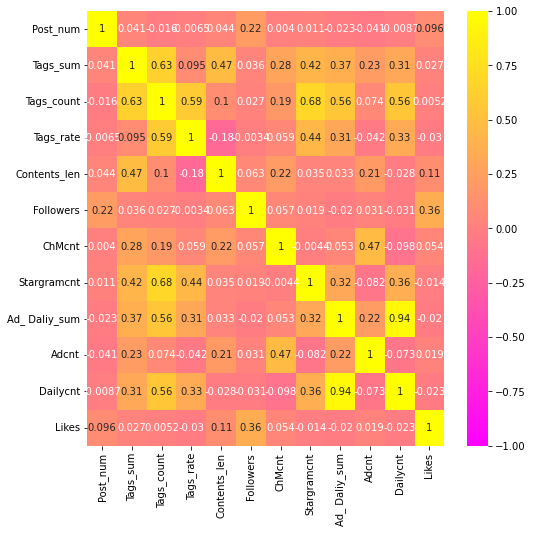

In [148]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(ch2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'spring', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [117]:
ch2.to_csv("./data/test_ch_addaily.csv")

# 2. 떡볶이

In [244]:
tpk = result[result["Category"] == "떡볶이"].copy()
tpk.reset_index(drop = True, inplace = True)
tpk.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,떡볶이,mae_chelin,989.0,37000.0,서울 5대 떡볶이 중에 한곳인 현선이네 20년전 포장마차에서 시작해서 많은 지...,"#떡볶이, #현선이네, #현선이네떡볶이, #분식, #생맥주, #현선이네본점, #즉석...",23,6,26.09,629,0.073878,498
1,떡볶이,_yamiyomi_,705.0,24000.0,냉장고에 쟁여두고 먹고싶은 빨간 무침군만두 솔직히 여기는 이거 먹으러 가는거죠 이...,"#이수, #애플하우스, #무침만두, #무침군만두, #만두, #양념만두, #분식, #...",11,2,18.18,1053,0.123679,545
2,떡볶이,biteofyommy,239.0,26000.0,대전 디저트 간판이 성심당이라면 떡볶이는 바로그집입니댜 바로그집 ...,"#바로그집, #저장필수, #대전데이트코스, #바로그집, #요미_대전",5,0,0.00,1801,0.211534,439
3,떡볶이,g.yoooong_place,482.0,27000.0,친구 수진 을 태그하면 꼭 사줘야 하는 곳이 있습니다 경기 성남시 수진역 근처에 ...,"#수진분식수진분식은, #떡볶이그, #김말이, #계란기본으로, #플_경기, #...",7,0,0.00,1403,0.164787,705
4,떡볶이,mukpresident,133.0,21000.0,쌀떡볶이파 국민 주목친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을 나눌 곳...,"#홍반장떡볶이, #먹통령_신림, #신림맛집, #신림역맛집, #서울대입구맛집, #쌀떡...",11,1,9.09,2633,0.309255,704


In [245]:
example_list = ['떡볶이'] # 밑에 워드클라우드 전처리과정에서 빈도수 상위10개 추출
test = '|'.join(example_list)
tpk["Tags"].str.split("'#'")[0].count(example_list[0])

0

In [246]:
Tags_count = [ ]
sentence = tpk["Tags"].str.split("#")[4][1:]
tmp=0
for j in range(len(example_list)):
    tmp += sum(map(lambda x : 1 if example_list[j] in x else 0, sentence))
Tags_count.append(tmp)

Tags_count

[5]

In [247]:
example_list = ['떡볶이맛집']
Tags_count = [ ]
for i in range(len(tpk)):
    text=[]
    sentence = tpk["Tags"].str.split("#")[i][1:]
    for s in range(len(sentence)):
        if "," in sentence[s]:
            text.append(sentence[s][:-2])
        else:
            text.append(sentence[s])

    tmp=0
    for j in range(len(example_list)):
        tmp += sum(map(lambda x : 1 if x == example_list[j] else 0, text))
        if tmp == 0:
            tmp = 0
        else:
            tmp = 1
    Tags_count.append(tmp)

In [248]:
tpk["TpkMcnt"] = Tags_count

In [249]:
example_list = ['맛스타그램',"먹스타그램"]
Tags_count = [ ]
for i in range(len(tpk)):
    text=[]
    sentence = tpk["Tags"].str.split("#")[i][1:]
    for s in range(len(sentence)):
        if "," in sentence[s]:
            text.append(sentence[s][:-2])
        else:
            text.append(sentence[s])

    tmp=0
    for j in range(len(example_list)):
        tmp += sum(map(lambda x : 1 if x == example_list[j] else 0, text))
        if tmp == 0:
            tmp = 0
        else:
            tmp = 1
    Tags_count.append(tmp)

In [250]:
tpk["Stargramcnt"] = Tags_count

In [251]:
tpk.head()

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len,TpkMcnt,Stargramcnt
0,떡볶이,mae_chelin,989.0,37000.0,서울 5대 떡볶이 중에 한곳인 현선이네 20년전 포장마차에서 시작해서 많은 지...,"#떡볶이, #현선이네, #현선이네떡볶이, #분식, #생맥주, #현선이네본점, #즉석...",23,6,26.09,629,0.073878,498,1,0
1,떡볶이,_yamiyomi_,705.0,24000.0,냉장고에 쟁여두고 먹고싶은 빨간 무침군만두 솔직히 여기는 이거 먹으러 가는거죠 이...,"#이수, #애플하우스, #무침만두, #무침군만두, #만두, #양념만두, #분식, #...",11,2,18.18,1053,0.123679,545,0,0
2,떡볶이,biteofyommy,239.0,26000.0,대전 디저트 간판이 성심당이라면 떡볶이는 바로그집입니댜 바로그집 ...,"#바로그집, #저장필수, #대전데이트코스, #바로그집, #요미_대전",5,0,0.00,1801,0.211534,439,0,0
3,떡볶이,g.yoooong_place,482.0,27000.0,친구 수진 을 태그하면 꼭 사줘야 하는 곳이 있습니다 경기 성남시 수진역 근처에 ...,"#수진분식수진분식은, #떡볶이그, #김말이, #계란기본으로, #플_경기, #...",7,0,0.00,1403,0.164787,705,0,0
4,떡볶이,mukpresident,133.0,21000.0,쌀떡볶이파 국민 주목친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을 나눌 곳...,"#홍반장떡볶이, #먹통령_신림, #신림맛집, #신림역맛집, #서울대입구맛집, #쌀떡...",11,1,9.09,2633,0.309255,704,1,0


In [257]:
tpk = tpk.drop(columns=["Scaled_likes", "Category", "ID", "Contents", "Tags"])

In [258]:
tpk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Post_num      2000 non-null   object 
 1   Followers     2000 non-null   object 
 2   Tags_sum      2000 non-null   int64  
 3   Tags_count    2000 non-null   int64  
 4   Tags_rate     2000 non-null   float64
 5   Likes         2000 non-null   int64  
 6   Contents_len  2000 non-null   int64  
 7   TpkMcnt       2000 non-null   int64  
 8   Stargramcnt   2000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 140.8+ KB


In [259]:
tpk["Post_num"] = tpk["Post_num"].astype("float64")
tpk["Followers"] = tpk["Followers"].astype("float64")

In [260]:
tpk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Post_num      2000 non-null   float64
 1   Followers     2000 non-null   float64
 2   Tags_sum      2000 non-null   int64  
 3   Tags_count    2000 non-null   int64  
 4   Tags_rate     2000 non-null   float64
 5   Likes         2000 non-null   int64  
 6   Contents_len  2000 non-null   int64  
 7   TpkMcnt       2000 non-null   int64  
 8   Stargramcnt   2000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 140.8 KB


In [261]:
tpk.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Likes,Contents_len,TpkMcnt,Stargramcnt
0,989.0,37000.0,23,6,26.09,629,498,1,0
1,705.0,24000.0,11,2,18.18,1053,545,0,0
2,239.0,26000.0,5,0,0.00,1801,439,0,0
3,482.0,27000.0,7,0,0.00,1403,705,0,0
4,133.0,21000.0,11,1,9.09,2633,704,1,0


In [262]:
tpk1 = tpk[['Post_num', 'Followers', 'Tags_sum', 'Tags_count', 'Tags_rate','Contents_len']]
tpk1

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len
0,989.0,37000.0,23,6,26.09,498
1,705.0,24000.0,11,2,18.18,545
2,239.0,26000.0,5,0,0.00,439
3,482.0,27000.0,7,0,0.00,705
4,133.0,21000.0,11,1,9.09,704
...,...,...,...,...,...,...
1995,20.0,72.0,5,1,20.00,86
1996,30.0,17.0,19,4,21.05,170
1997,30.0,17.0,15,3,20.00,143
1998,2499.0,3775.0,30,5,16.67,1144


In [263]:
tpk_notmm = tpk[["TpkMcnt","Stargramcnt","Likes"]]
tpk_notmm.head()

,TpkMcnt,Stargramcnt,Likes
0,1,0,629
1,0,0,1053
2,0,0,1801
3,0,0,1403
4,1,0,2633


In [265]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
tpk_scaled = scale.fit_transform(tpk1)

tpk_scaled_minmax = pd.DataFrame(tpk_scaled, columns=['Post_num', 'Followers', 'Tags_sum', 'Tags_count', 'Tags_rate', 'Contents_len'])
tpk_scaled_minmax.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len
0,0.047095,0.037336,0.396552,0.461538,0.2609,0.254872
1,0.033571,0.024218,0.189655,0.153846,0.1818,0.278974
2,0.011381,0.026236,0.086207,0.000000,0.0000,0.224615
3,0.022952,0.027245,0.120690,0.000000,0.0000,0.361026
4,0.006333,0.021191,0.189655,0.076923,0.0909,0.360513


In [266]:
tpk2 = pd.concat([tpk_scaled_minmax,tpk_notmm],axis=1)
tpk2

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,TpkMcnt,Stargramcnt,Likes
0,0.047095,0.037336,0.396552,0.461538,0.2609,0.254872,1,0,629
1,0.033571,0.024218,0.189655,0.153846,0.1818,0.278974,0,0,1053
2,0.011381,0.026236,0.086207,0.000000,0.0000,0.224615,0,0,1801
3,0.022952,0.027245,0.120690,0.000000,0.0000,0.361026,0,0,1403
4,0.006333,0.021191,0.189655,0.076923,0.0909,0.360513,1,0,2633
...,...,...,...,...,...,...,...,...,...
1995,0.000952,0.000073,0.086207,0.076923,0.2000,0.043590,0,0,22
1996,0.001429,0.000017,0.327586,0.307692,0.2105,0.086667,0,1,15
1997,0.001429,0.000017,0.258621,0.230769,0.2000,0.072821,0,1,8
1998,0.119000,0.003809,0.517241,0.384615,0.1667,0.586154,0,1,22


In [267]:
tpk2.corr(method="pearson")

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,TpkMcnt,Stargramcnt,Likes
Post_num,1.000000,0.175891,0.081506,0.043302,0.024793,0.054983,0.054725,0.073151,0.005127
Followers,0.175891,1.000000,0.086157,0.090851,-0.016883,0.173768,0.084618,0.044423,0.259899
Tags_sum,0.081506,0.086157,1.000000,0.613373,-0.102319,0.463490,0.191929,0.299563,0.010228
Tags_count,0.043302,0.090851,0.613373,1.000000,0.425961,0.229696,0.318036,0.599582,0.017500
Tags_rate,0.024793,-0.016883,-0.102319,0.425961,1.000000,-0.192933,0.120435,0.278789,-0.028429
Contents_len,0.054983,0.173768,0.463490,0.229696,-0.192933,1.000000,0.125055,0.056086,0.151223
TpkMcnt,0.054725,0.084618,0.191929,0.318036,0.120435,0.125055,1.000000,0.200933,0.158512
Stargramcnt,0.073151,0.044423,0.299563,0.599582,0.278789,0.056086,0.200933,1.000000,-0.002877
Likes,0.005127,0.259899,0.010228,0.017500,-0.028429,0.151223,0.158512,-0.002877,1.000000


<AxesSubplot:>

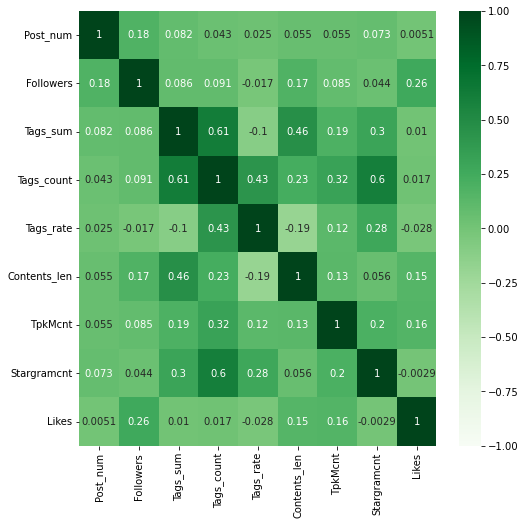

In [268]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(tpk2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

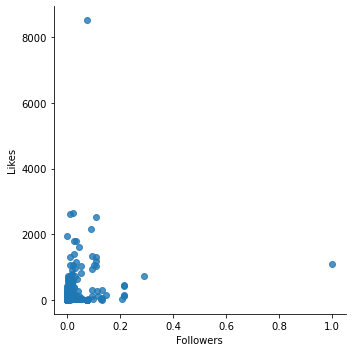

In [169]:
sns.lmplot(x='Followers',y='Likes', data=tpk2, fit_reg=False)

In [270]:
tpk2.to_csv("./data/test_tpk.csv")

In [271]:
result

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,돈까스,bbo_muksta,-,-,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,2,33.33,3126,0.396449,377
1,돈까스,___foodtour,-,-,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,0,0.00,3750,0.475587,467
2,돈까스,mukpresident,-,-,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,2,25.00,2761,0.350159,634
3,돈까스,fooseidon_,-,-,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#북천, #북천돈까스🔱11:00~19:30, #푸세이돈_용...",18,0,0.00,7885,1.000000,469
4,돈까스,cayeongmi9,-,-,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,4,21.05,317,0.040203,393
...,...,...,...,...,...,...,...,...,...,...,...,...
13325,햄버거,na.swrs.on,-,-,행운버거 행운이 있음 좋겠네 맥도날드 햄버거 행운버거 좋반 먹팔 푸드스타그램 ...,"#맥도날드, #햄버거, #행운버거, #좋반, #먹팔, #푸드스타그램, #일상그램, ...",30,7,23.33,95,0.012349,209
13326,햄버거,what.theburger_ph,-,-,What_the_burger_ph 치킨신메뉴판매중 버거랑 치킨이랑 같이 먹으면...,"#포항핫플레이스, #포항죽도동맛집, #포항맛집추천, #포항왓더버거, #포항수제버거,...",14,1,7.14,16,0.002080,255
13327,햄버거,to840815,-,-,몬스터신부101번째프로포즈 영화오랜만에 극장나들이 즐겁고 배부른 하루 상봉...,"#몬스터신부101번째프로포즈, #영화오랜만에, #상봉, #cgv, #팝콘, #햄버거...",7,1,14.29,5,0.000650,63
13328,햄버거,suny6250,-,-,방학을 한 첫찌ㅠ ㅠ 전쟁이 따로없군학교갈때도전쟁이라 생각했는데 방학이 더 전...,"#첫찌방학, #둘찌와함께, #육아는, #헬이네요, #음.., #애셋을, #오늘점심은...",14,1,7.14,13,0.001690,271


# 치킨, 떡볶이 합치기

In [275]:
ch2.columns = ['Post_num', 'Followers', 'Tags_sum', 'Tags_count', 'Tags_rate',
       'Contents_len', 'CMcnt', 'Stargramcnt', 'Likes']

In [278]:
tpk2.columns = ['Post_num', 'Followers', 'Tags_sum', 'Tags_count', 'Tags_rate',
       'Contents_len', 'CMcnt', 'Stargramcnt', 'Likes']

In [280]:
ck = pd.concat([ch2, tpk2])

In [281]:
ck.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,CMcnt,Stargramcnt,Likes
0,0.00472,0.006562,0.314286,0.166667,0.2727,0.247144,1,0,1040
1,0.00256,0.002563,0.257143,0.166667,0.3333,0.135514,1,0,109
2,0.01482,0.005285,0.000000,0.000000,0.0000,0.264798,0,0,109
3,0.04356,0.020595,0.000000,0.000000,0.0000,0.012980,0,0,9
4,0.01212,0.000778,0.800000,0.444444,0.2857,0.099688,0,1,19


In [282]:
ck.to_csv("./data/test_ck.csv")

In [283]:
ck.corr(method="pearson")

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,CMcnt,Stargramcnt,Likes
Post_num,1.000000,0.175922,-0.009855,0.024466,0.012979,0.058055,0.026681,0.031974,0.033801
Followers,0.175922,1.000000,0.042430,0.054495,-0.009613,0.115612,0.068056,0.028346,0.303658
Tags_sum,-0.009855,0.042430,1.000000,0.560375,0.019757,0.391870,0.245600,0.375669,0.010373
Tags_count,0.024466,0.054495,0.560375,1.000000,0.507500,0.169742,0.248286,0.639928,0.012044
Tags_rate,0.012979,-0.009613,0.019757,0.507500,1.000000,-0.185949,0.088922,0.361233,-0.029124
Contents_len,0.058055,0.115612,0.391870,0.169742,-0.185949,1.000000,0.165051,0.040243,0.134924
CMcnt,0.026681,0.068056,0.245600,0.248286,0.088922,0.165051,1.000000,0.088957,0.106107
Stargramcnt,0.031974,0.028346,0.375669,0.639928,0.361233,0.040243,0.088957,1.000000,-0.009822
Likes,0.033801,0.303658,0.010373,0.012044,-0.029124,0.134924,0.106107,-0.009822,1.000000


<AxesSubplot:>

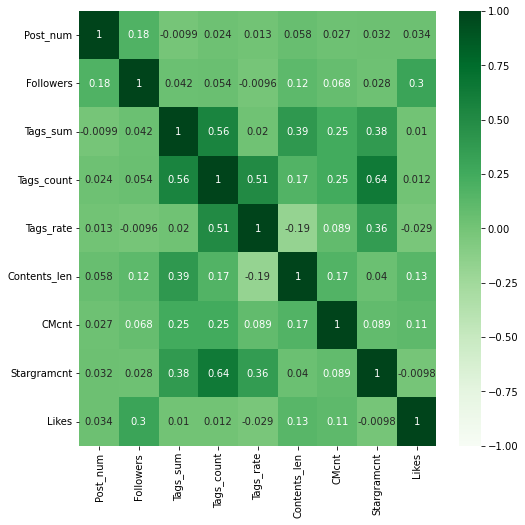

In [284]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(ck.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [3]:
ch = pd.read_csv("./data/test_ch.csv", index_col=0)
ch.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,ChMcnt,Stargramcnt,Likes
0,0.00472,0.006562,0.314286,0.166667,0.2727,0.247144,1,0,1040
1,0.00256,0.002563,0.257143,0.166667,0.3333,0.135514,1,0,109
2,0.01482,0.005285,0.000000,0.000000,0.0000,0.264798,0,0,109
3,0.04356,0.020595,0.000000,0.000000,0.0000,0.012980,0,0,9
4,0.01212,0.000778,0.800000,0.444444,0.2857,0.099688,0,1,19


<AxesSubplot:>

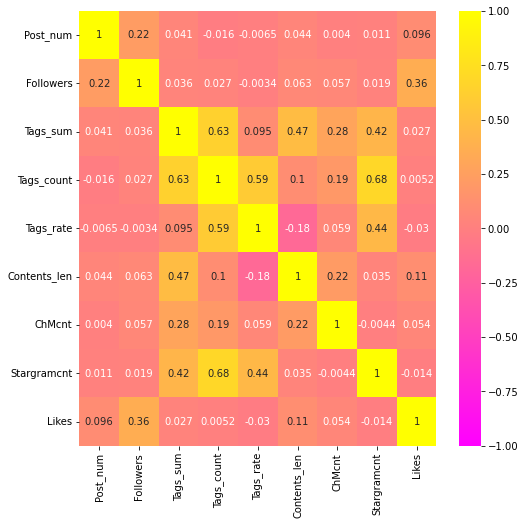

In [16]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(ch.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'spring', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [17]:
ch = pd.read_csv("./data/test_tpk.csv", index_col=0)
ch.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,TpkMcnt,Stargramcnt,Likes
0,0.047095,0.037336,0.396552,0.461538,0.2609,0.254872,1,0,629
1,0.033571,0.024218,0.189655,0.153846,0.1818,0.278974,0,0,1053
2,0.011381,0.026236,0.086207,0.000000,0.0000,0.224615,0,0,1801
3,0.022952,0.027245,0.120690,0.000000,0.0000,0.361026,0,0,1403
4,0.006333,0.021191,0.189655,0.076923,0.0909,0.360513,1,0,2633


<AxesSubplot:>

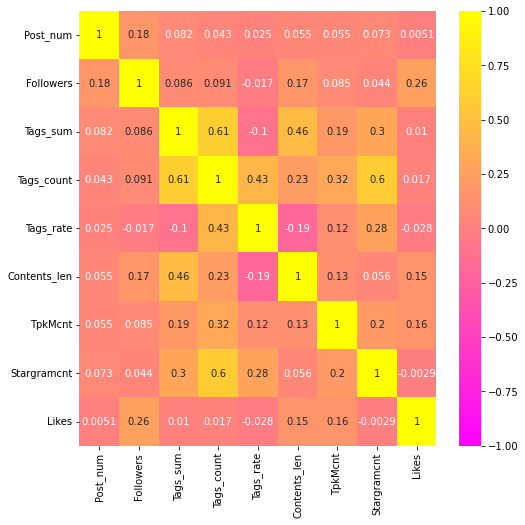

In [18]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(ch.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'spring', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [19]:
ch = pd.read_csv("./data/test_ck.csv", index_col=0)
ch.head()

,Post_num,Followers,Tags_sum,Tags_count,Tags_rate,Contents_len,CMcnt,Stargramcnt,Likes
0,0.00472,0.006562,0.314286,0.166667,0.2727,0.247144,1,0,1040
1,0.00256,0.002563,0.257143,0.166667,0.3333,0.135514,1,0,109
2,0.01482,0.005285,0.000000,0.000000,0.0000,0.264798,0,0,109
3,0.04356,0.020595,0.000000,0.000000,0.0000,0.012980,0,0,9
4,0.01212,0.000778,0.800000,0.444444,0.2857,0.099688,0,1,19


<AxesSubplot:>

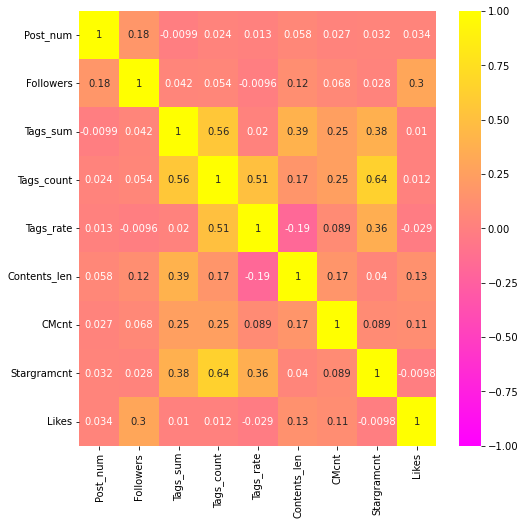

In [20]:
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(ch.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'spring', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )